In [1]:
# This program predicts stock prices by using machine learning

In [2]:
import numpy as np
import quandl
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
API_KEY = '8ohVvwCgmzgRpFeza8FD'
quandl.ApiConfig.api_key = API_KEY

In [4]:
#  Get the stock data
df = quandl.get("WIKI/FB")
df

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2012-05-18,42.05,45.00,38.00,38.2318,573576400.0,0.0,1.0,42.05,45.00,38.00,38.2318,573576400.0
2012-05-21,36.53,36.66,33.00,34.0300,168192700.0,0.0,1.0,36.53,36.66,33.00,34.0300,168192700.0
2012-05-22,32.61,33.59,30.94,31.0000,101786600.0,0.0,1.0,32.61,33.59,30.94,31.0000,101786600.0
2012-05-23,31.37,32.50,31.36,32.0000,73600000.0,0.0,1.0,31.37,32.50,31.36,32.0000,73600000.0
2012-05-24,32.95,33.21,31.77,33.0300,50237200.0,0.0,1.0,32.95,33.21,31.77,33.0300,50237200.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-03-21,164.80,173.40,163.30,169.3900,105350867.0,0.0,1.0,164.80,173.40,163.30,169.3900,105350867.0
2018-03-22,166.13,170.27,163.72,164.8900,73389988.0,0.0,1.0,166.13,170.27,163.72,164.8900,73389988.0
2018-03-23,165.44,167.10,159.02,159.3900,52306891.0,0.0,1.0,165.44,167.10,159.02,159.3900,52306891.0


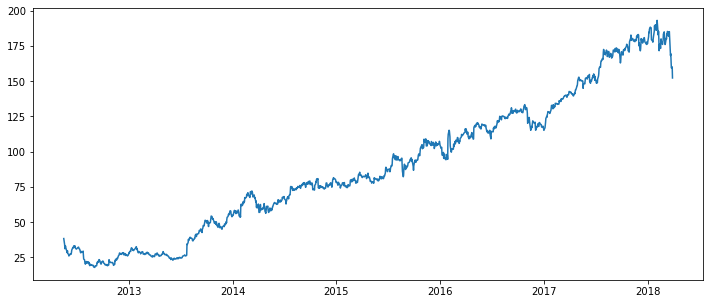

In [5]:
# Get the adjusted close price
df_adj_close = df[['Adj. Close']]

plt.figure(figsize=(12,5))
plt.plot(df_adj_close.index,df_adj_close['Adj. Close'])
plt.show()

In [6]:
# A variable for predicting 'n' days out in future
forecast_out = 1
